<a href="https://colab.research.google.com/github/ashwinamrutphale/aml-homeworks/blob/master/homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import nltk
from sklearn.feature_extraction import stop_words
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression





In [0]:
input_df = pd.read_csv('http://courses.engr.illinois.edu/cs498aml/sp2019/homeworks/yelp_2k.csv')


In [0]:
class Vector:
  def __init__(self,vector,bag_of_words):
    self.vector = vector
    self.bag_of_words = bag_of_words
    
def plot(bag_of_words):
  sum_words = bag_of_words.sum(axis=0) 
  f = np.sort(sum_words)
  y = np.squeeze(np.asarray(f[0:1,::-1]))
  x_coordinate = [i for i in range(len(y))]
  plt.scatter(x_coordinate, y)
  plt.show()

def get_stop_words_plot(data):
  vectorizer =CountVectorizer()
  bag_of_words = vectorizer.fit_transform(data)
  stop_word = []
  plot(bag_of_words)
  for word in stop_words.ENGLISH_STOP_WORDS:
    if word in vectorizer.vocabulary_:
      stop_word.append(word)
  return stop_word
    

def get_final_bfw(data,stop_words,min_df,max_df):
  vectorizer = CountVectorizer(stop_words=stop_words,max_df=max_df, min_df=min_df)
  bag_of_words = vectorizer.fit_transform(data)
  plot(bag_of_words)
  return Vector(vectorizer,bag_of_words)

def get_nearest_neighbors(data,vector,point,n):
  neigh = NearestNeighbors(n_neighbors=n)
  neigh.fit(vector.bag_of_words)
  x = v.vector.transform(point)
  r = neigh.kneighbors(x, return_distance=True) 
  return data.iloc[r[1][0]],r[0]
  

  
  
 


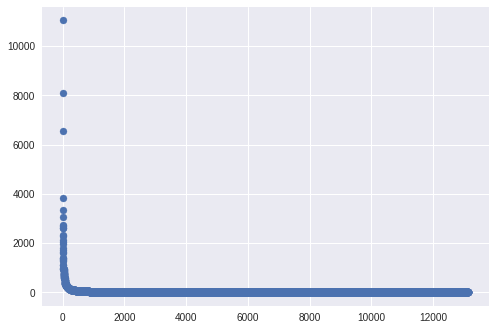

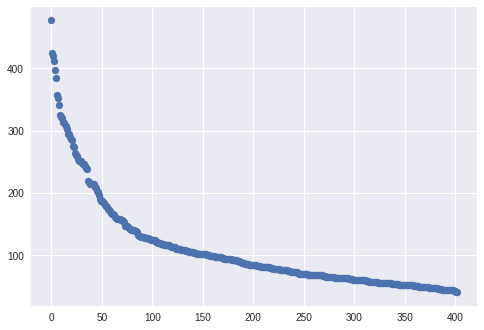

In [31]:
words = get_stop_words_plot(input_df["text"])
v = get_final_bfw(input_df["text"],words,40,400)
# x = v.vector.transform(["Horrible customer service"])
get_nearest_neighbors(input_df,v,["Horrible customer service"],5)
df_features = pd.DataFrame(v.bag_of_words.toarray())
feature = df_features.join(input_df["stars"])
train_df,test_df = train_test_split(feature, test_size=0.10, random_state=42)



In [0]:

clf = LogisticRegression(random_state=0, solver='liblinear').fit(train_df.values[:,:-1],train_df.values[:,-1:].flatten()) 


In [81]:
#clf.score(train_df.values[:,:-1],train_df.values[:,-1:].flatten())
clf.score(test_df.values[:,:-1],test_df.values[:,-1:].flatten())


0.88

In [0]:
prob = pd.DataFrame(clf.predict_proba(train_df.values[:,:-1]))

In [83]:
res = prob.join(train_df["stars"])
res

,0,1,stars
0,0.000285,9.997153e-01,1.0
1,0.285291,7.147092e-01,5.0
2,0.999270,7.299376e-04,1.0
3,0.634098,3.659024e-01,1.0
4,0.908582,9.141814e-02,5.0
5,0.483221,5.167787e-01,1.0
6,0.078015,9.219854e-01,1.0
7,0.738362,2.616379e-01,5.0
8,0.997507,2.492888e-03,1.0
9,0.999163,8.365256e-04,1.0


In [0]:
x1 = res.loc[res.stars==1, 0]
x2 = res.loc[res.stars==5,0]

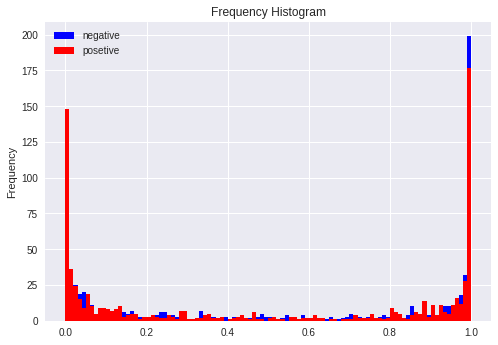

In [85]:
plt.hist(x1, 100, color='b', label='negative')
plt.hist(x2, 100, color='r', label='posetive')
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
plt.legend();

In [62]:
x2

1       0.256919
4       0.938420
7       0.782913
11      0.006966
14      0.067408
17      0.000238
19      0.999214
21      0.999115
22      0.017630
25      0.209776
27      0.147938
33      0.002302
34      0.984191
35      0.999167
36      1.000000
38      0.915681
39      0.999938
40      0.005895
47      0.880212
51      0.999550
52      1.000000
53      0.987583
59      0.999978
61      1.000000
63      0.001490
64      0.000005
66      0.996046
68      0.003701
76      0.001869
79      0.017754
          ...   
1725    0.839539
1726    0.961597
1727    0.999997
1733    0.001886
1736    0.008968
1737    0.993028
1738    0.917804
1739    0.253446
1740    0.965517
1744    1.000000
1749    0.000003
1751    0.500999
1753    0.999999
1755    0.835180
1756    0.000475
1760    0.999984
1762    0.004594
1766    0.938429
1768    0.998508
1769    0.010222
1770    0.691497
1772    0.969416
1774    0.000013
1778    0.994698
1779    0.052267
1780    0.000034
1781    0.679617
1783    0.0218